In [1]:

import numpy as np
from numpy.linalg import inv, multi_dot
from scipy.stats import norm
from tabulate import tabulate

# Import matplotlib for visualization
import matplotlib.pyplot as plt

In [10]:
# defining variables
mu = np.array([[0.04], [0.08], [0.12], [0.15]])
S = np.matrix([[0.07, 0, 0, 0], [0, 0.12, 0, 0], [0, 0, 0.18, 0], [0, 0, 0, 0.26]])
R = np.matrix([[1, 0.2, 0.5, 0.3], [0.2, 1, 0.7, 0.4], [0.5, 0.7, 1, 0.9], [0.3, 0.4, 0.9, 1]])
E = np.matmul(np.matmul(S, R), S)
E_inv = np.linalg.inv(E)
one = np.ones(4)

m = 0.1

In [8]:
E

matrix([[0.0049 , 0.00168, 0.0063 , 0.00546],
        [0.00168, 0.0144 , 0.01512, 0.01248],
        [0.0063 , 0.01512, 0.0324 , 0.04212],
        [0.00546, 0.01248, 0.04212, 0.0676 ]])

In [14]:
def get_cov_matrix(stress = 1):
    cov_mat = np.matmul(np.matmul(S, R*stress), S)
    cov_mat_inv = np.linalg.inv(E)
    return cov_mat, cov_mat_inv

def get_factors(one, mu, E_inv):
    A = np.array(one.T*E_inv).dot(one)
    B = np.array(mu.T*E_inv).dot(one)
    C = np.array(mu.T*E_inv).dot(mu)
    return A, B, C

def optimal_coeff(m, A, B, C):
    lam = (A*m - B)/(A*C - B*B)
    gam = (C - B*m)/(A*C - B*B)
    return lam, gam

def optimal_weights(m, stress = 1):
    E , E_inv = get_cov_matrix(stress)
    A, B, C = get_factors(one, mu, E_inv)
    lam, gam = optimal_coeff(m, A, B, C)
    return np.array(E_inv*(lam*mu + (gam*one).T))

def get_return(weights, returns):
    return  weights.T.dot(returns)[0]

def get_std(weights, Cov_mat):
    return np.sqrt(np.array(weights.T*Cov_mat).dot(weights))[0]

# --------------Calculating for optimal weight------------------#

w_opt = optimal_weights(m, stress=1)

# calculating return and vol using optimal weights
m_opt = get_return(w_opt, mu)
rho_opt = get_std(w_opt, E)

In [25]:
# Optimal Weight for assets
w_opt


array([[ 0.05867697],
       [ 0.75902696],
       [-0.31954512],
       [ 0.50184119]])

In [112]:
# implementing stress on correlation matrix
stress_factor = [1, 1.25, 1.5]
opt_weights = [ optimal_weights(m, stress= i) for i in stress_factor]


In [114]:
np.array(opt_weights)

array([[[0.78511066],
        [0.05386419],
        [0.13355472],
        [0.02747042]],

       [[0.78511066],
        [0.05386419],
        [0.13355472],
        [0.02747042]],

       [[0.78511066],
        [0.05386419],
        [0.13355472],
        [0.02747042]]])

In [17]:
# Simulating 2000 portfolios

wts = np.array([np.random.dirichlet(np.ones(4), size=1)[0] for i in range(2000)])
vol = np.zeros(2000)
ret = np.zeros(2000)

for i in range(2000):
    vol[i] = np.sqrt(np.array(wts[i].T*E).dot(wts[i]))[0]
    ret[i] = wts[i].dot(mu)[0]


In [31]:
rho_opt = 0.025774729325875177
m_opt = 0.033608


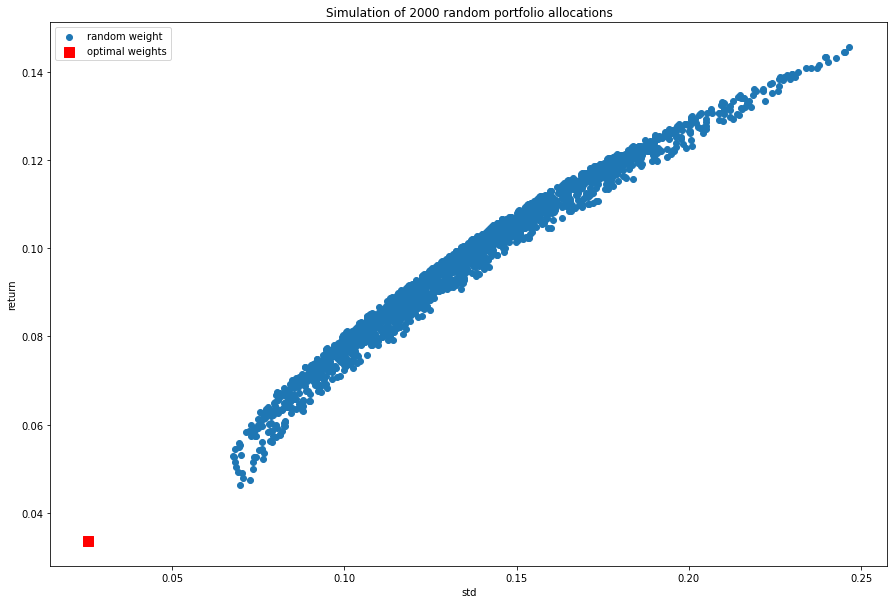

In [32]:
plt.figure(figsize=(15,10))
plt.scatter(vol, ret )
plt.scatter(rho_opt, m_opt, c = 'r', marker='s', s = 100)
plt.xlabel('std')
plt.ylabel('return')
plt.legend(['random portfolio', 'optimal portolio'])
plt.title('Simulation of 2000 random portfolio allocations')
plt.show()

In [19]:
wts_t = np.zeros(shape=(4,4))
r  = [0.005, 0.01, 0.015, 0.0175]

In [20]:
# constructing the tangency portfolio

r  = [0.005, 0.01, 0.015, 0.0175]
wts_t = np.zeros(shape=(4,4))
vol_t = np.zeros(4)
mu_t =np.zeros(4)

for i in range(4):
    A, B, C = get_factors(one, mu, E_inv)
    wts_t[i] = (np.array(E_inv*(mu - r[i]*one)).T/(B - A*r[i]))[0]
    vol_t[i] = np.sqrt((C - 2*r[i]*B + r[i]*r[i]*A)/((B - A*r[i])**2))[0]
    mu_t[i] =  (C - B*r[i])/(B - A*r[i])[0]



NameError: name 'B' is not defined

In [21]:
wts_t

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [22]:
# Plotting the true Efficient Frontier

returns = np.array([i for i in range(1, 101)])/1000
return_weights = np.array([optimal_weights(x) for x in returns])
std_weights = np.array([get_std(return_weights[w,:], E) for w in range(100)])

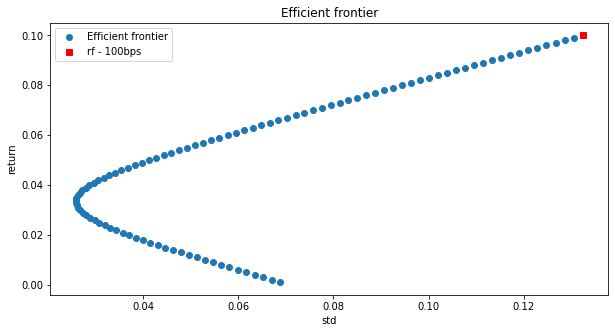

In [23]:
plt.figure(figsize=(10, 5))
plt.scatter(std_weights, returns )
plt.scatter(rho_opt, m_opt, c = 'r', marker='s')
plt.xlabel('std')
plt.ylabel('return')
plt.legend(['Efficient frontier', 'rf - 100bps', 'rf - 175bps'])
plt.title('Efficient frontier')
plt.show()